In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import io
from PIL import Image
from matplotlib import image as mpimg
import pickle

In [53]:
data_test = np.load('data_test.npy')

In [54]:
named_labels = ['MI', 'NORM', 'OTHER']
named_labels = np.array(named_labels)

In [55]:
def predict(data, mod):
    # Make predictions on validation set
    with open('modeladam_LSTM', 'rb') as f :
        model_cnn = pickle.load(f)
    with open('modeladam_LSTM', 'rb') as f :
        model_lstm = pickle.load(f)
    with open('modeladam_LSTM', 'rb') as f :
        model_dnn = pickle.load(f)
        
    label_test = np.load('label_test.npy')
    if mod == 'cnn' :
        model = model_cnn
    elif mod == 'lstm' :
        model = model_lstm
    elif mod == 'dnn' :
        model = model_dnn
    Y_pred = model.predict(data)
    Y_pred_labels = np.argmax(Y_pred, axis=1)
    Y_true_labels = np.argmax(label_test, axis=1)
    # Matriks konfusi
    conf_matrix = confusion_matrix(Y_true_labels, Y_pred_labels, labels=np.arange(len(named_labels)))
    return conf_matrix

In [56]:
mod = 'lstm'

In [57]:
def model_performance(data, mod):
    cf_matrix = predict(data, mod)
    performance_result = []
    mean_performance_result = []
    true_positive = np.diag(cf_matrix)
    false_negative = np.sum(cf_matrix, axis=1) - true_positive
    false_positive = np.sum(cf_matrix, axis=0) - true_positive
    true_negative = np.sum(cf_matrix) - (true_positive + false_negative + false_positive)
    # Calculate the total number of samples
    total_samples = sum(sum(row) for row in cf_matrix)


    accuracy = (true_positive + true_negative) / total_samples
    sensitivity = true_positive / (true_positive + false_negative)
    specificity = true_negative / (true_negative + false_positive)

    mean_accuracy = np.mean(accuracy)
    mean_sensitivity = np.mean(sensitivity)
    mean_specificity = np.mean(specificity)
    
    performance_result.extend((accuracy, sensitivity,  specificity))
    mean_performance_result.extend((mean_accuracy, mean_sensitivity,  mean_specificity))
    
    return cf_matrix, performance_result, mean_performance_result

In [58]:
cf_matrix, performance_result, mean_performance_result = model_performance(data_test, mod)

170/170 [==============================] - 18s 84ms/step


In [59]:
print("Confusion Matrix : ")
print(cf_matrix)

Confusion Matrix : 
[[1589   70   80]
 [ 101 1491  248]
 [  66  201 1564]]


In [18]:
print("Accuracy:", performance_result[0])
print("Sensitivity:", performance_result[1])
print("Specificity:", performance_result[2])

Accuracy: [0.94140481 0.88539741 0.89001848]
Sensitivity: [0.91374353 0.81032609 0.85417804]
Specificity: [0.95450831 0.92408964 0.90835429]


In [19]:
print("Mean Accuracy:", mean_performance_result[0])
print("Mean Sensitivity:", mean_performance_result[1])
print("Mean Specificity:", mean_performance_result[2])

Mean Accuracy: 0.9056069008009858
Mean Sensitivity: 0.8594158875018666
Mean Specificity: 0.928984077708234


In [21]:
def create_confusion_matrix(cf_matrix, path):
    # Calculate percentages for each true class
    conf_matrix_percentage = cf_matrix / cf_matrix.sum(axis=1, keepdims=True) * 100
    # Create a heatmap using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=named_labels, yticklabels=named_labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix - Prediction Percentages')
    plt.savefig(path)

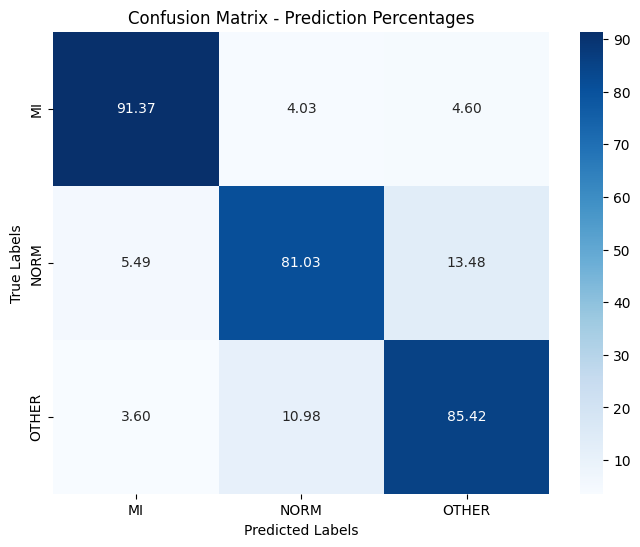

In [22]:
path = 'test.png'
create_confusion_matrix(cf_matrix, path)

In [33]:
data_reshaped = data_test.reshape(data_test.shape[0], data_test.shape[1])
data_reshaped.shape

(5410, 98)

In [34]:
DF = pd.DataFrame(data_reshaped)
DF.to_csv("data_test.csv")

In [28]:
import csv
with open('data_test.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)

In [37]:
def csv_to_numpy(csv_file):
    data = np.genfromtxt(csv_file, delimiter=',', skip_header=1)
    return data

In [45]:
new_data = csv_to_numpy('data_test.csv')
new_data[0][98]

-0.24047726632952343

In [ ]:
print("Mean Accuracy:", mean_performance_result[0])
print("Mean Sensitivity:", mean_performance_result[1])
print("Mean Specificity:", mean_performance_result[2])